In [19]:
import json
from functools import partial

import networkx as nx
import pandas as pd
from networkx.readwrite.json_graph import node_link_graph
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("/export/share/markusz33dm/logs/may-run-omega0025_cycles.csv", sep=";")
df["bundled_cycle"] = df["bundled_cycle"].apply(json.loads).apply(partial(node_link_graph, edges="edges"))


In [21]:
df["m"] = df["bundled_cycle"].apply(lambda x: x.number_of_edges())
df["n"] = df["bundled_cycle"].apply(lambda x: x.number_of_nodes())

None


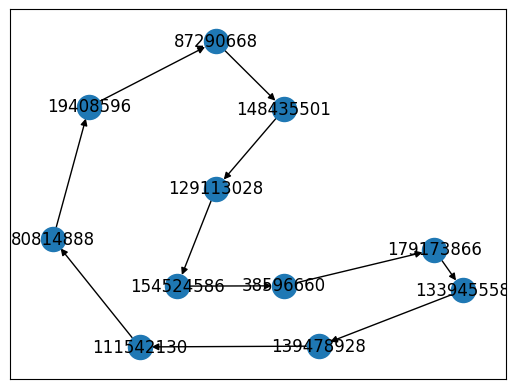

None


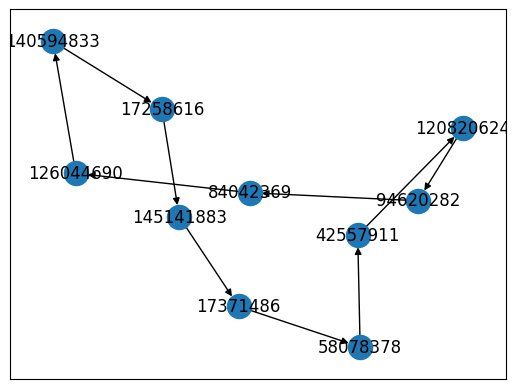

None


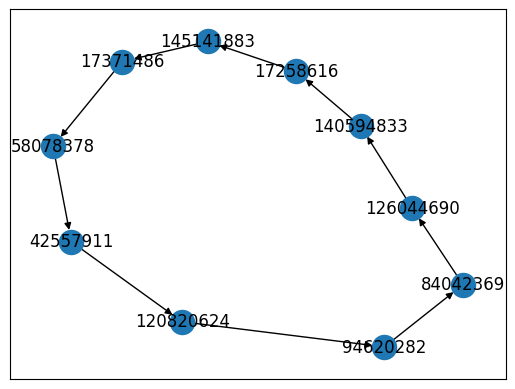

None


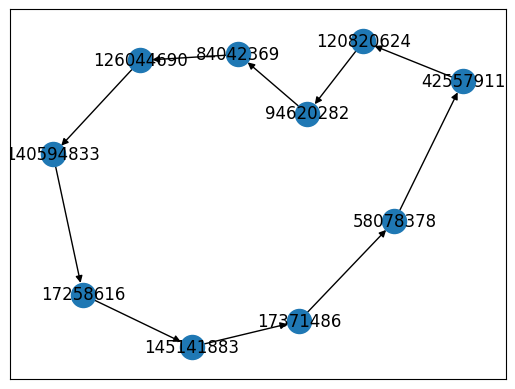

None


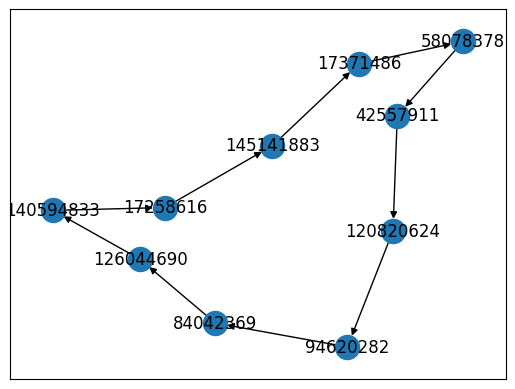

None


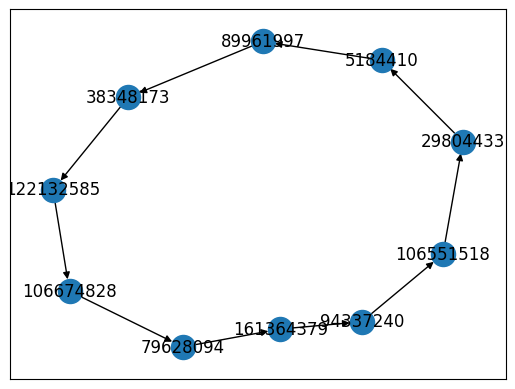

None


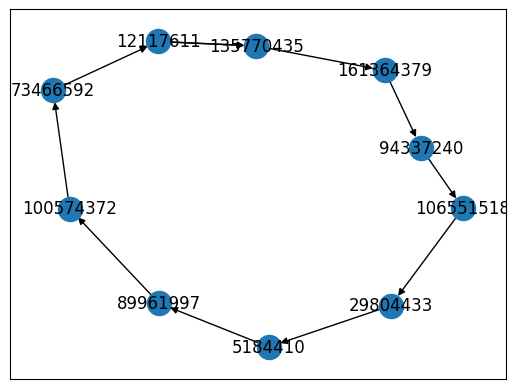

None


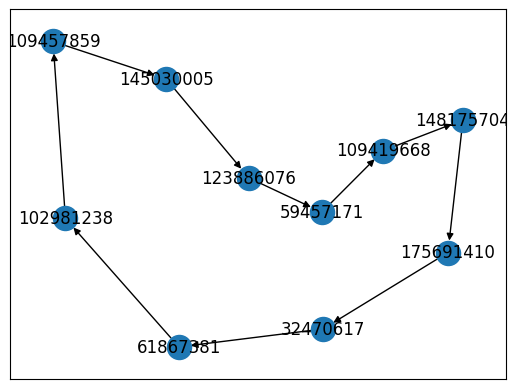

None


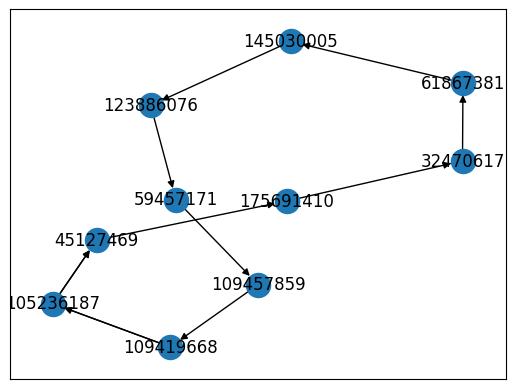

None


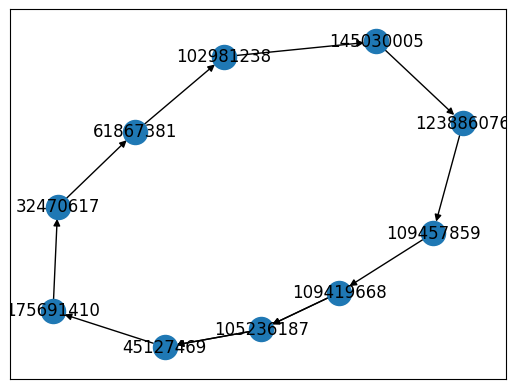

None


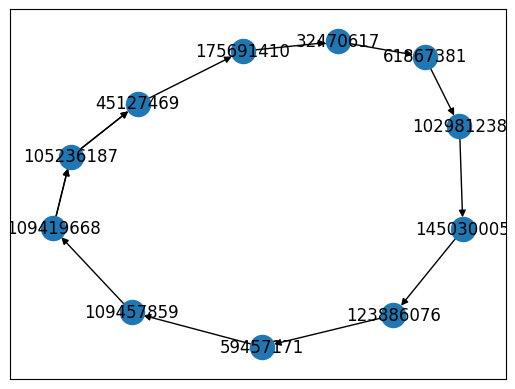

None


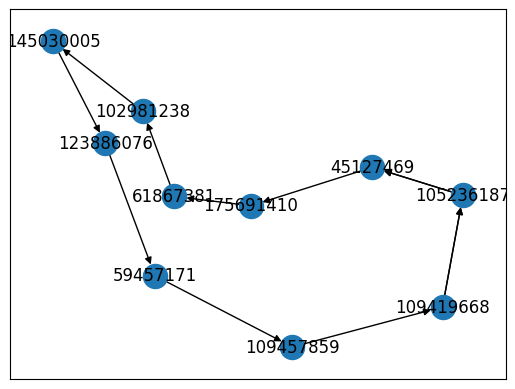

None


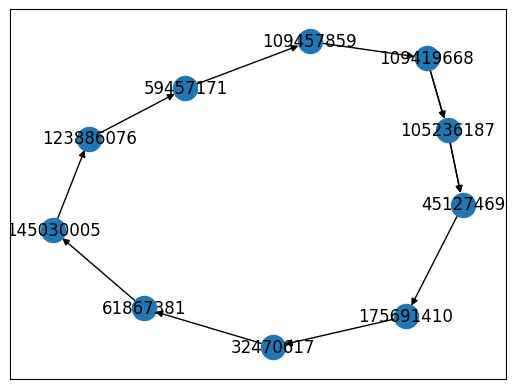

None


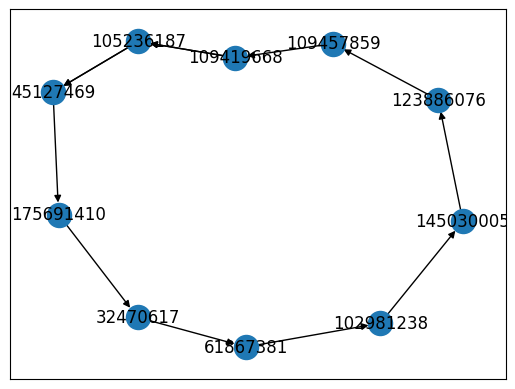

None


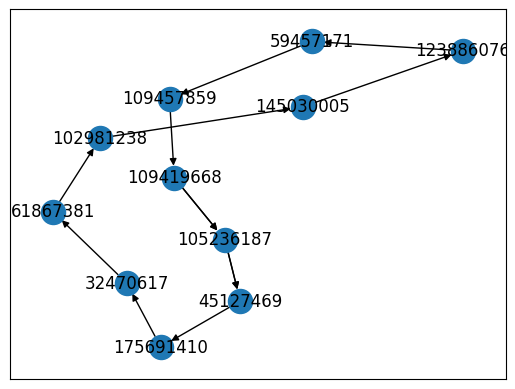

None


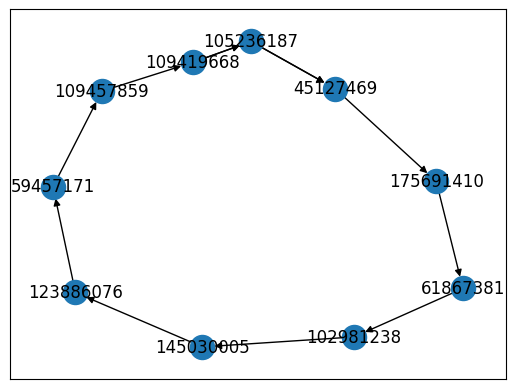

None


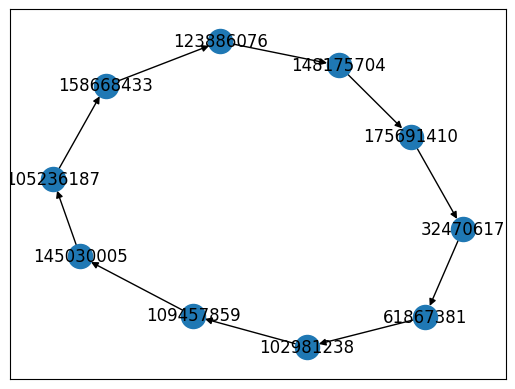

None


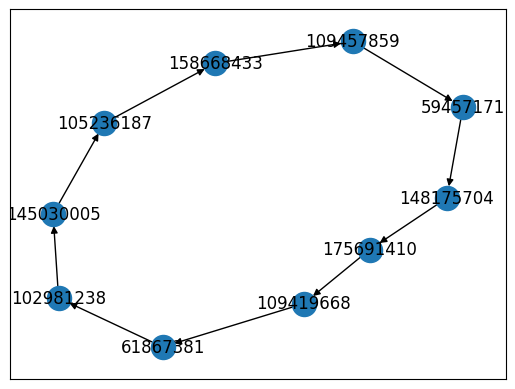

None


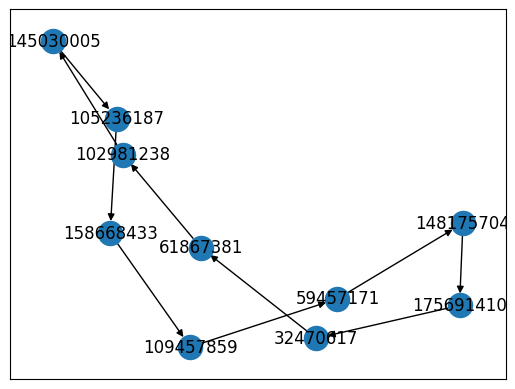

None


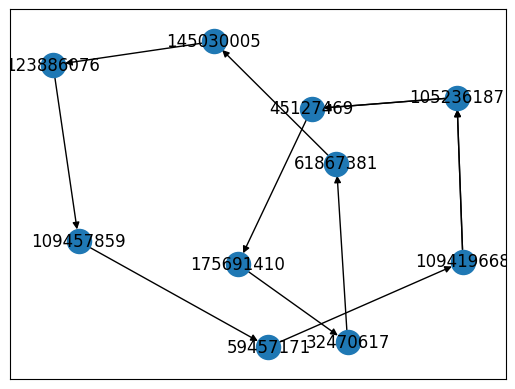

None


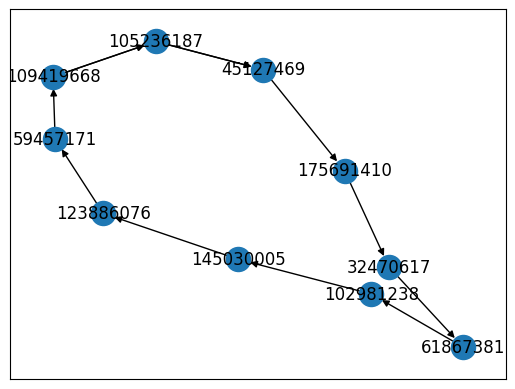

None


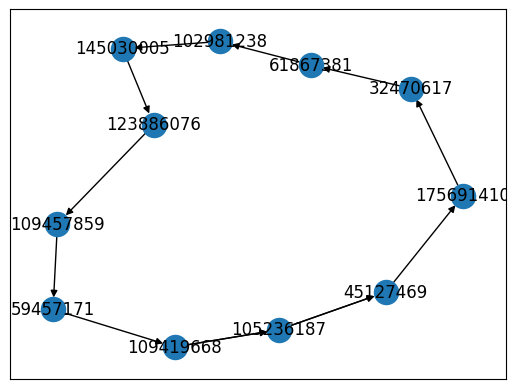

None


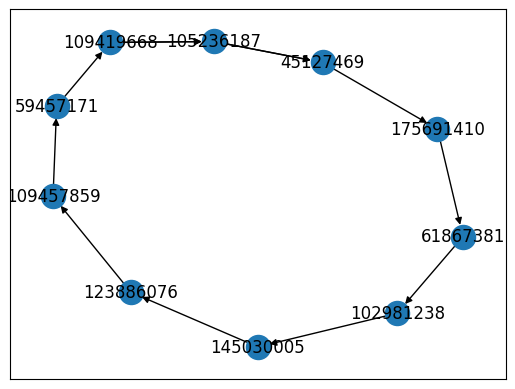

None


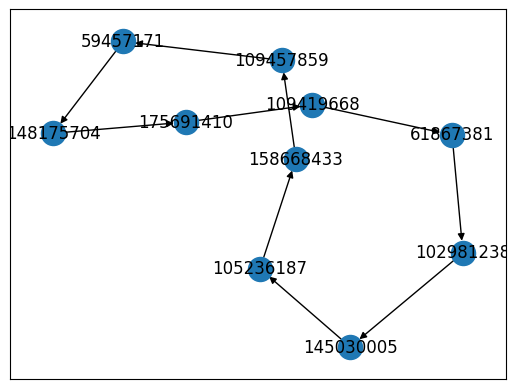

None


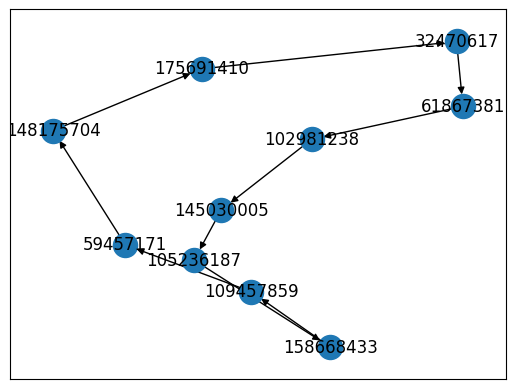

None


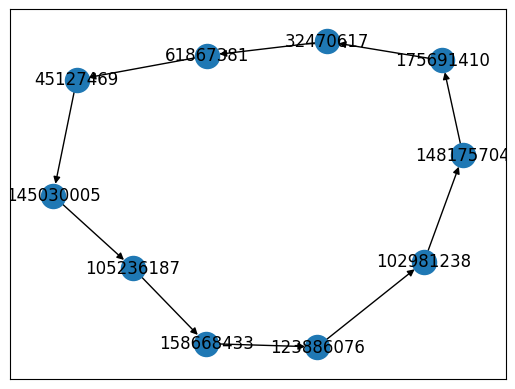

None


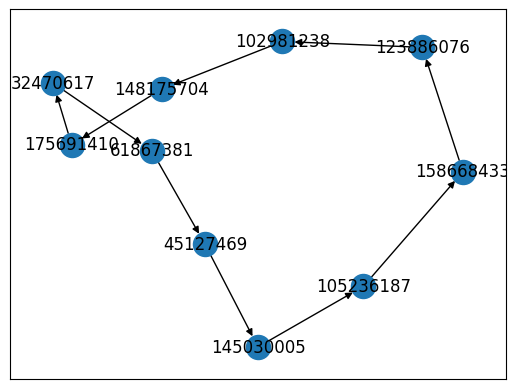

None


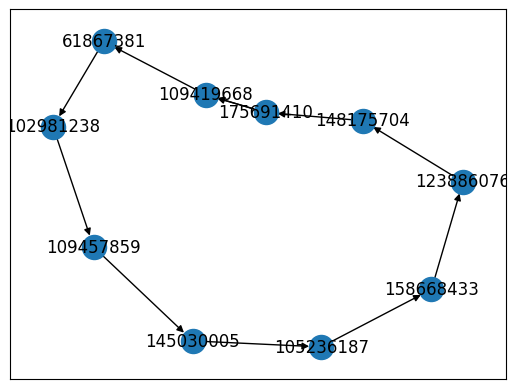

None


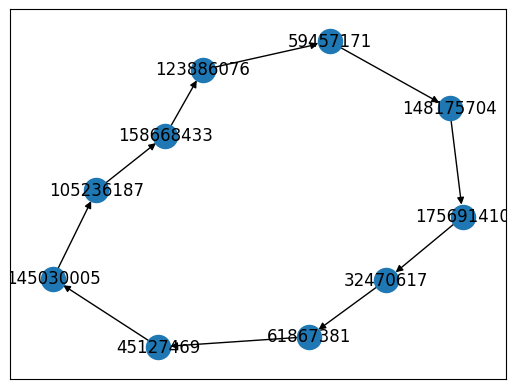

None


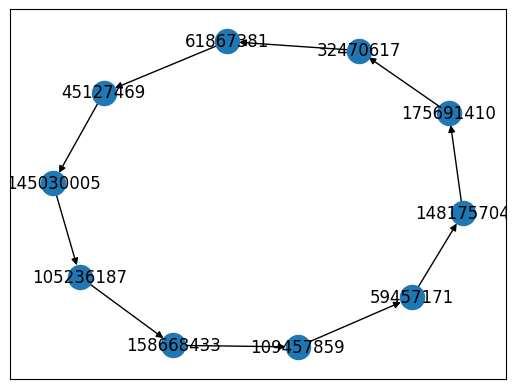

None


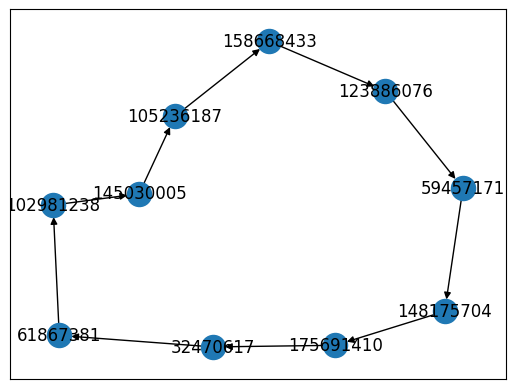

None


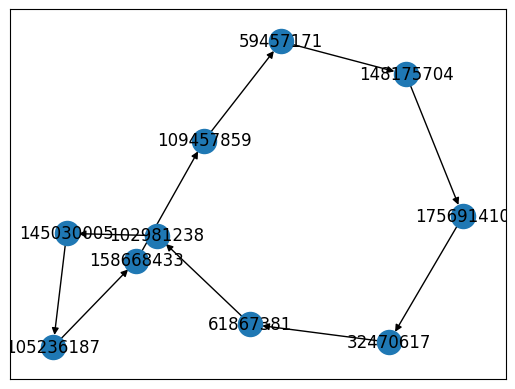

None


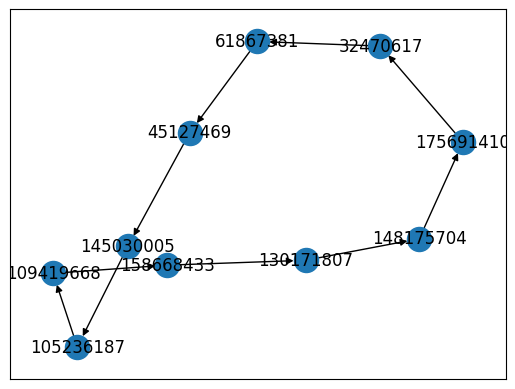

None


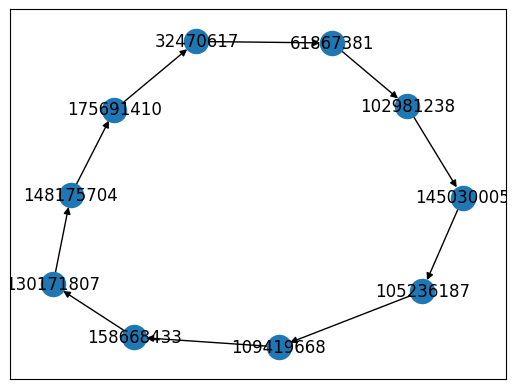

None


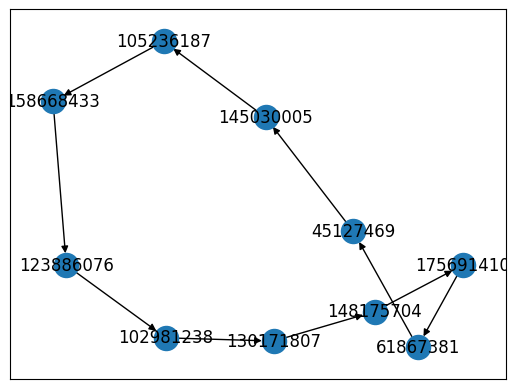

None


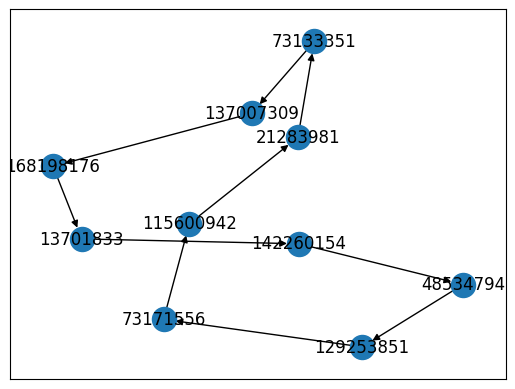

None


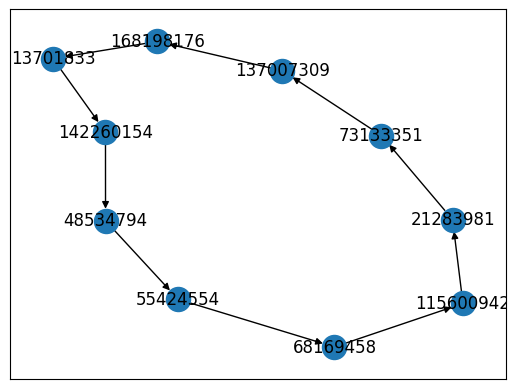

None


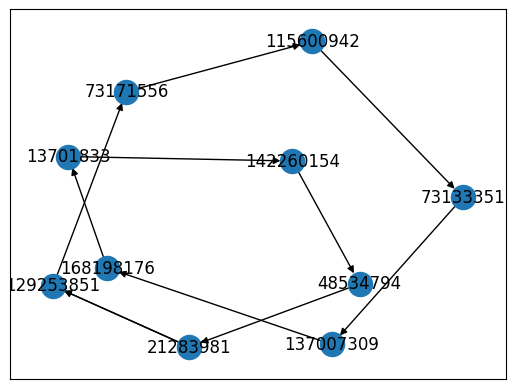

None


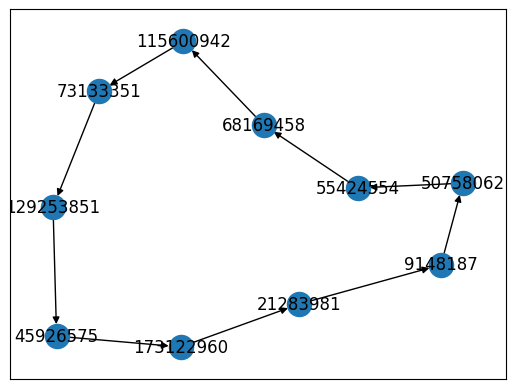

None


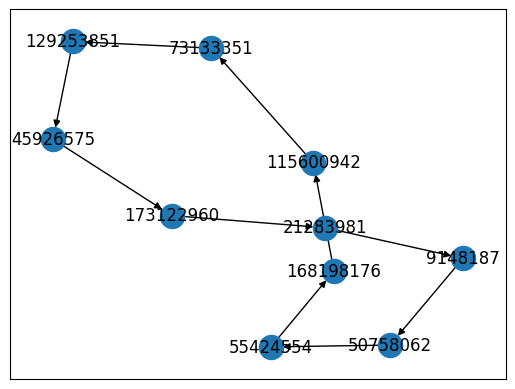

None


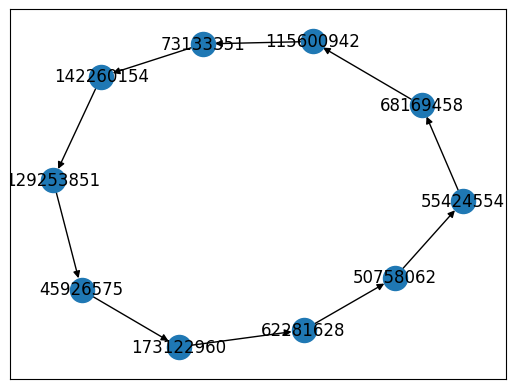

None


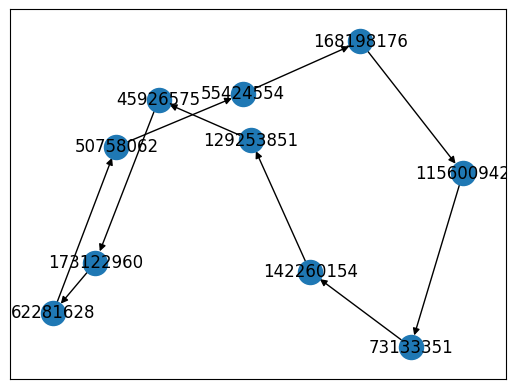

None


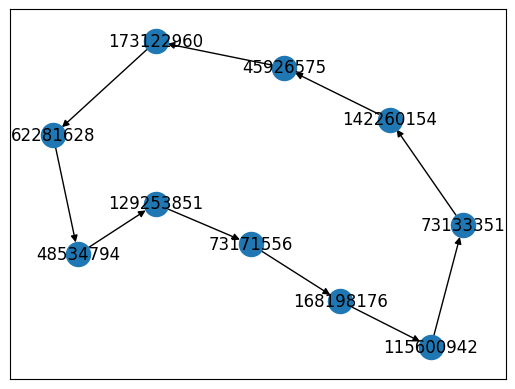

None


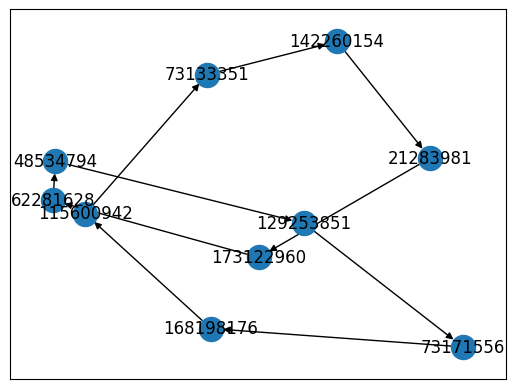

None


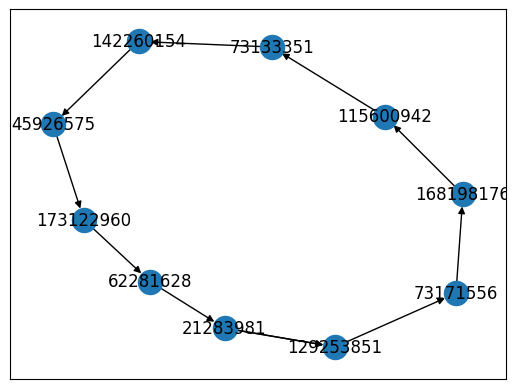

None


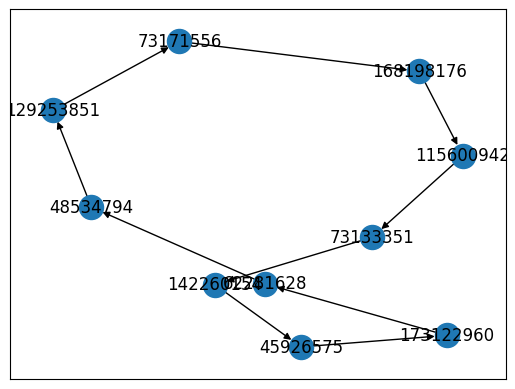

None


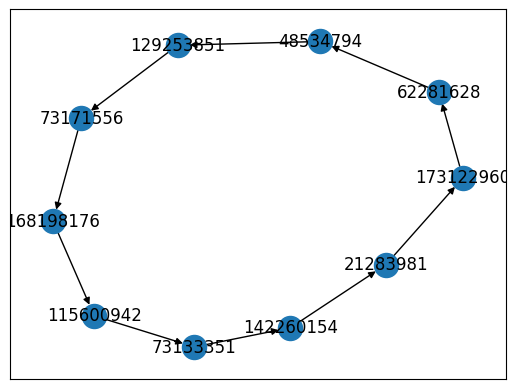

None


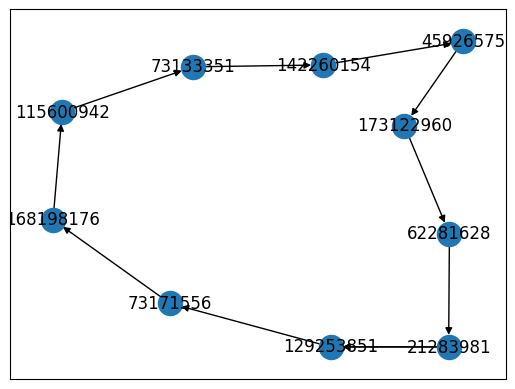

None


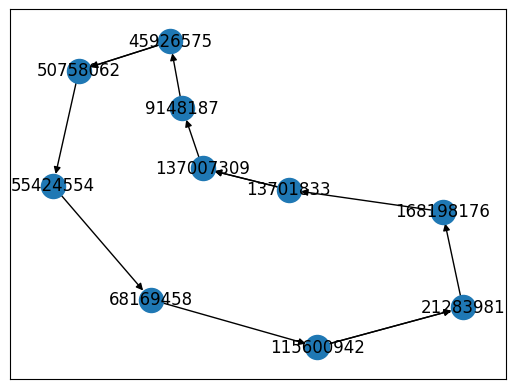

None


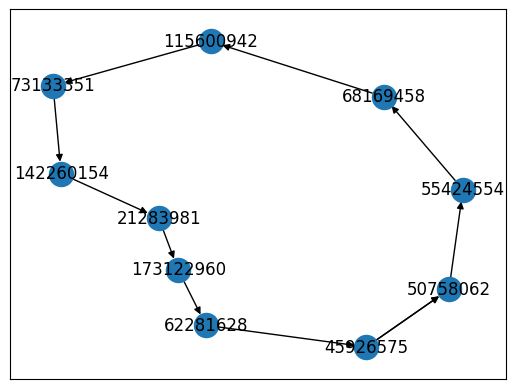

None


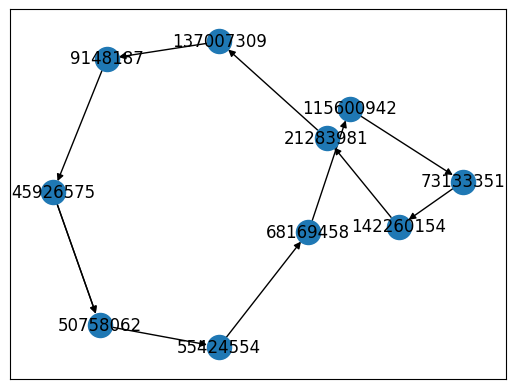

None


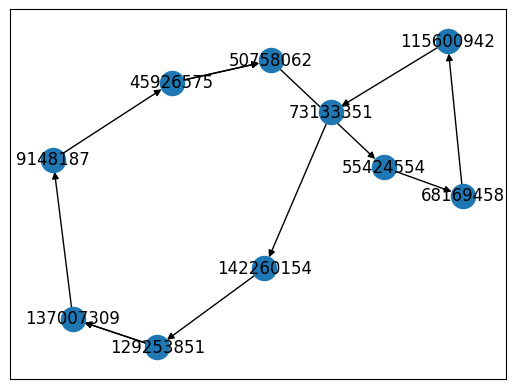

None


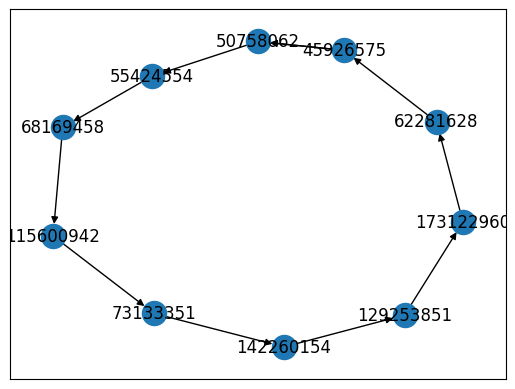

None


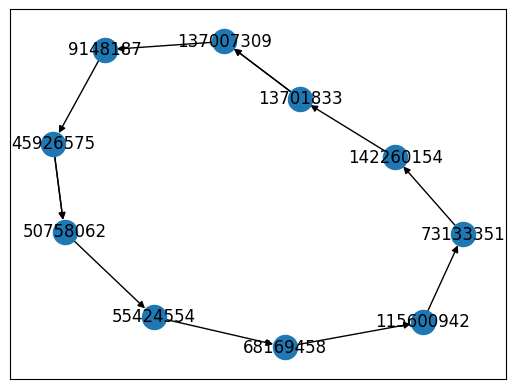

None


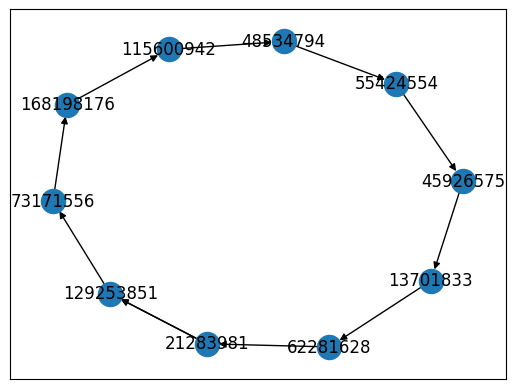

None


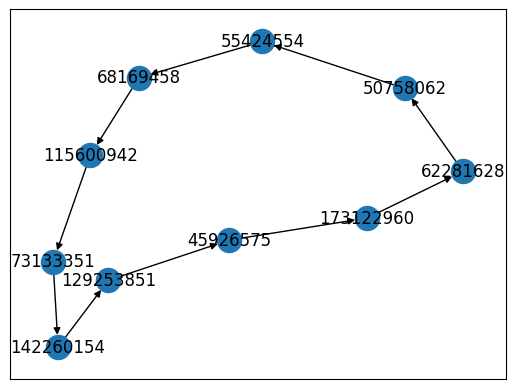

None


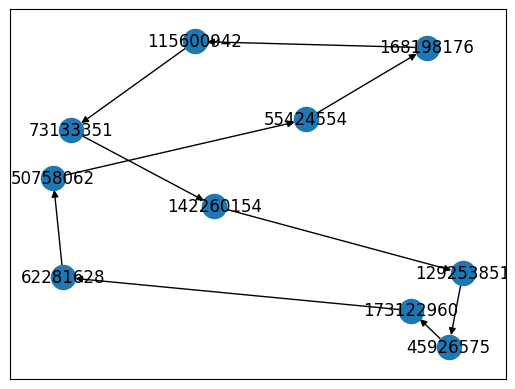

None


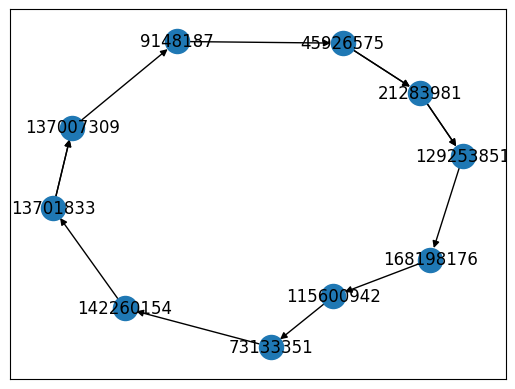

None


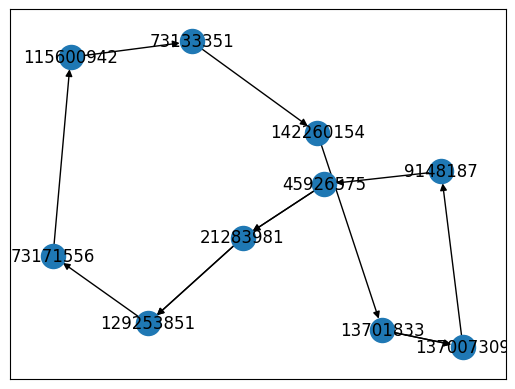

None


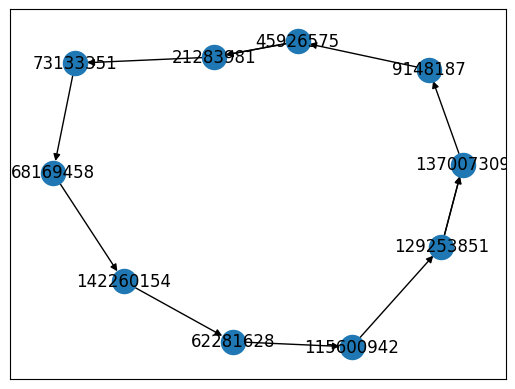

None


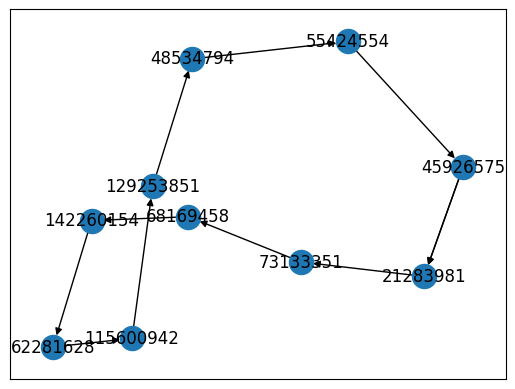

None


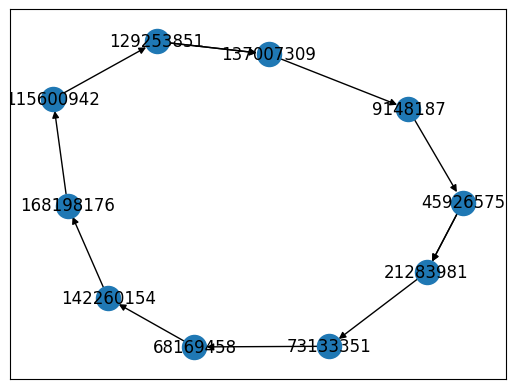

None


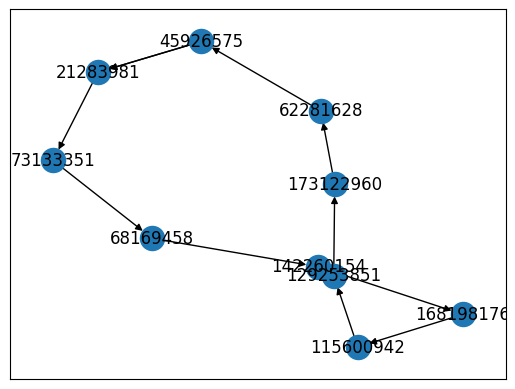

None


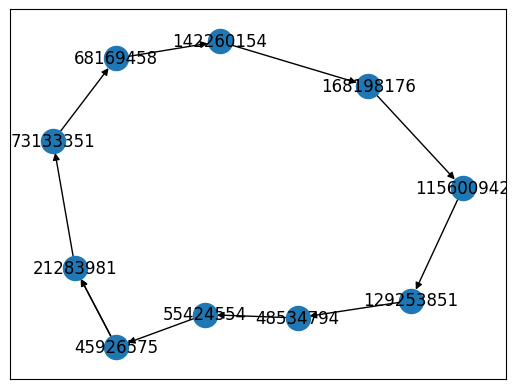

None


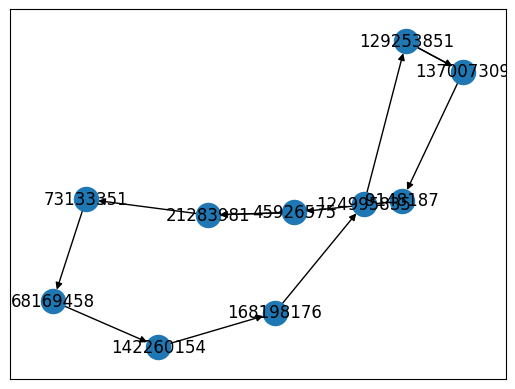

None


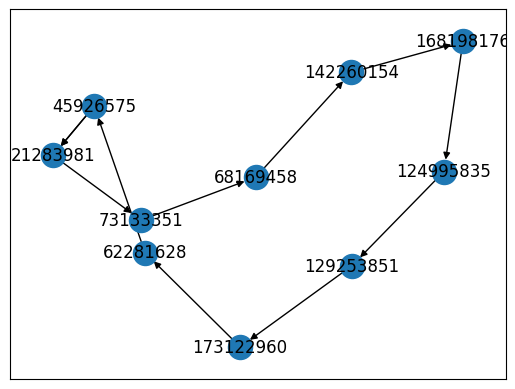

None


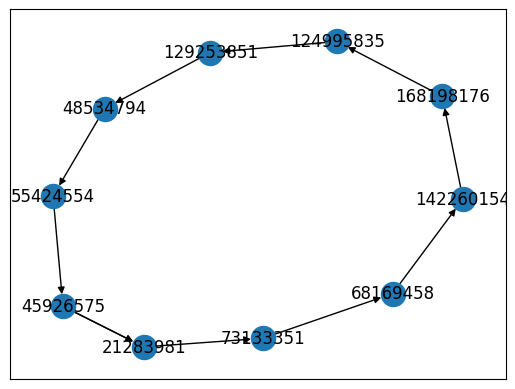

None


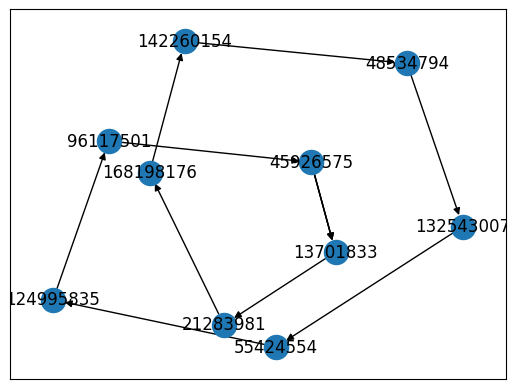

None


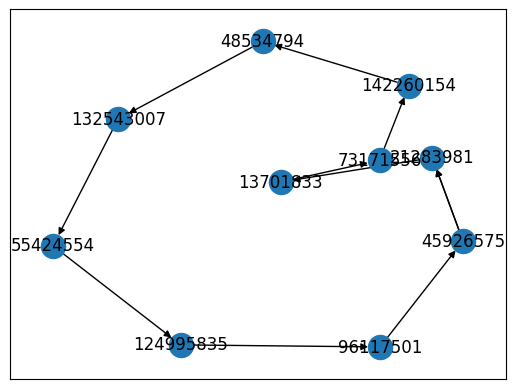

None


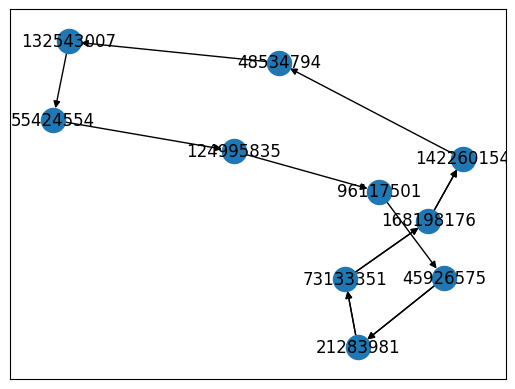

None


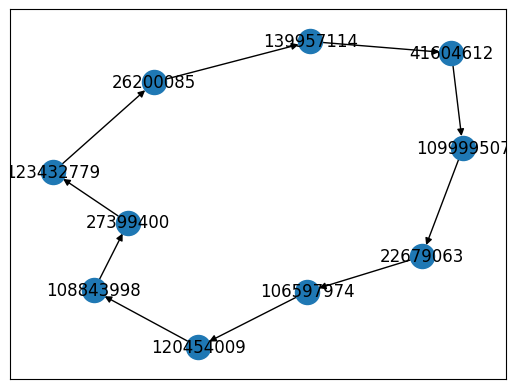

None


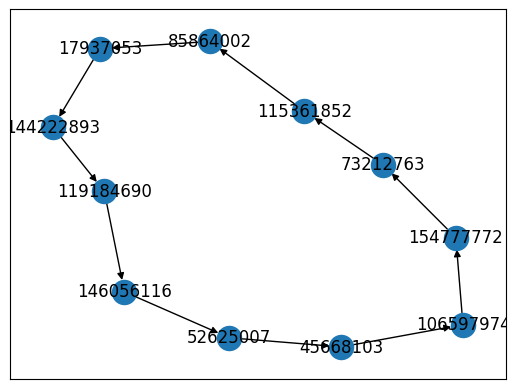

<Figure size 640x480 with 0 Axes>

In [22]:
# for i, row in df[df["m"] > df["n"]].iterrows():
for i, row in df[df["n"] > 9].iterrows():
    print(nx.draw_networkx(row["bundled_cycle"]))
    plt.show()
    plt.clf()

In [23]:
for n in range(df.n.min(), df.n.max() + 1):
    print(n, len(df[df.n == n]))

2 340038
3 71012
4 39116
5 18166
6 9170
7 4016
8 1487
9 386
10 67
11 5


In [24]:
df[df["n"] > 9]

,seed_begin,seed_end,next_seed_begin,candidates,bundled_cycle,m,n
25648,13444188,13444213,NaN,"[129113028, 80814888, 154524586, 179173866, 87...","(19408596, 87290668, 80814888, 111542130, 1394...",11,11
109241,13884876,13884899,NaN,"[84042369, 58078378, 120820624, 140594833, 126...","(42557911, 120820624, 58078378, 17371486, 1451...",10,10
109242,13884878,13884901,NaN,"[84042369, 58078378, 120820624, 140594833, 126...","(120820624, 94620282, 42557911, 58078378, 1737...",10,10
109246,13884884,13884906,NaN,"[84042369, 58078378, 120820624, 140594833, 126...","(94620282, 84042369, 120820624, 42557911, 5807...",10,10
109247,13884887,13884908,NaN,"[84042369, 58078378, 120820624, 140594833, 126...","(84042369, 126044690, 94620282, 120820624, 425...",10,10
...,...,...,...,...,...,...,...
213415,14112825,14112850,NaN,"[164553479, 13701833, 48534794, 66416139, 2128...","(55424554, 124995835, 132543007, 48534794, 142...",12,10
213434,14112825,14112850,NaN,"[164553479, 13701833, 48534794, 66416139, 2128...","(55424554, 124995835, 132543007, 48534794, 142...",11,10
213437,14112825,14112850,NaN,"[164553479, 13701833, 48534794, 66416139, 2128...","(55424554, 124995835, 132543007, 48534794, 142...",14,10
464149,14790767,14790792,NaN,"[41604612, 27399400, 123432779, 109999507, 262...","(106597974, 120454009, 22679063, 109999507, 41...",10,10
